In [242]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
warnings.filterwarnings("ignore", category=FutureWarning)

In [243]:
# Function to fetch historical data for a given ticker and period
def fetch_data(ticker, period):
    stock = yf.Ticker(ticker)
    return stock.history(period=period)


def plot_stock(data, label, color):
    plt.plot(data.index, data['Close'], label=f"{label} Close Price", color=color)


# Function to calculate and plot normalized data
def plot_normalized_data(data, ticker, color, subplot):
    rolling_mean = data["Close"].rolling(window=30).mean()
    normalized_data = data["Close"] / rolling_mean
    subplot.plot(data.index, normalized_data, label=ticker, color=color)
    subplot.set_title(f"Normalized Stock Prices for {ticker}")
    subplot.set_ylabel("Normalized Closing Price")

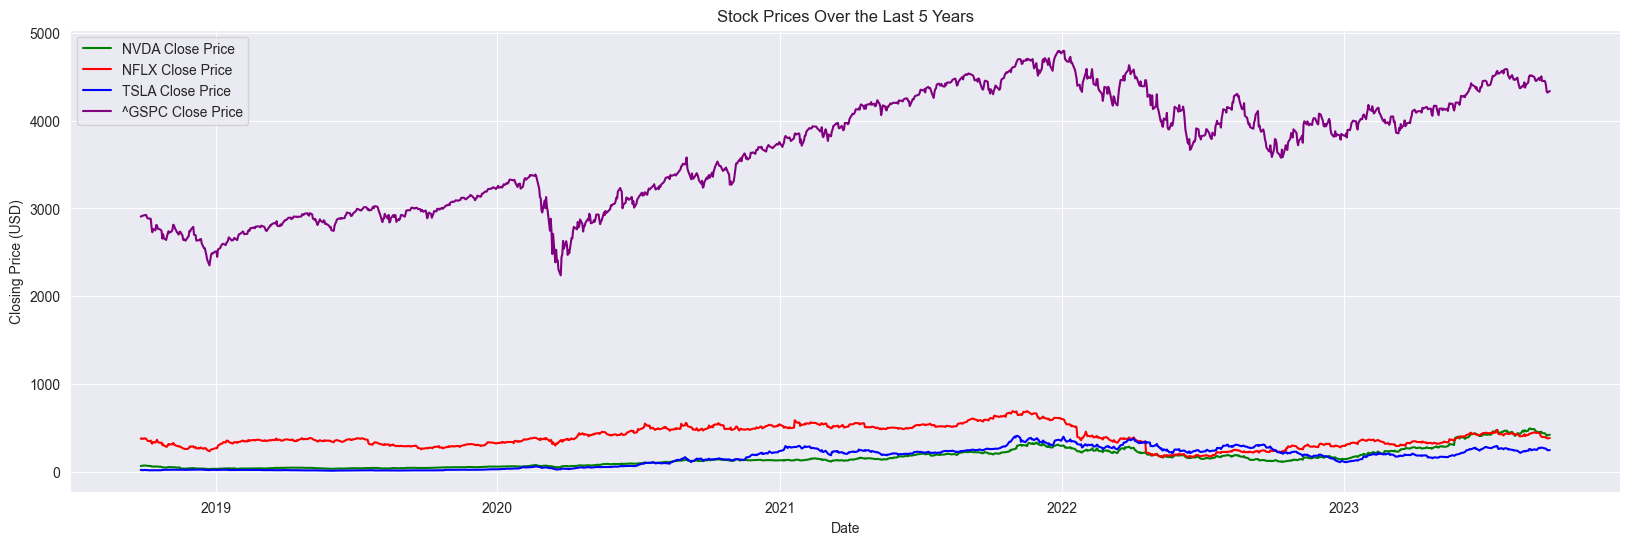

In [244]:
# Tickers and period
tickers = ["NVDA", "NFLX", "TSLA","^GSPC"]
colors = ["green", "red", "blue", "purple" ]# Added "^GSPC" for S&P 500
ticker_colors = {ticker: color for ticker, color in zip(tickers, colors)}
period = "5y"

# Fetch and plot historical data for each stock
plt.figure(figsize=(20, 6))
  # Added a color for S&P 500
for ticker, color in zip(tickers, colors):
    stock_data = fetch_data(ticker, period)
    plot_stock(stock_data, ticker, color)

plt.title("Stock Prices Over the Last 5 Years")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

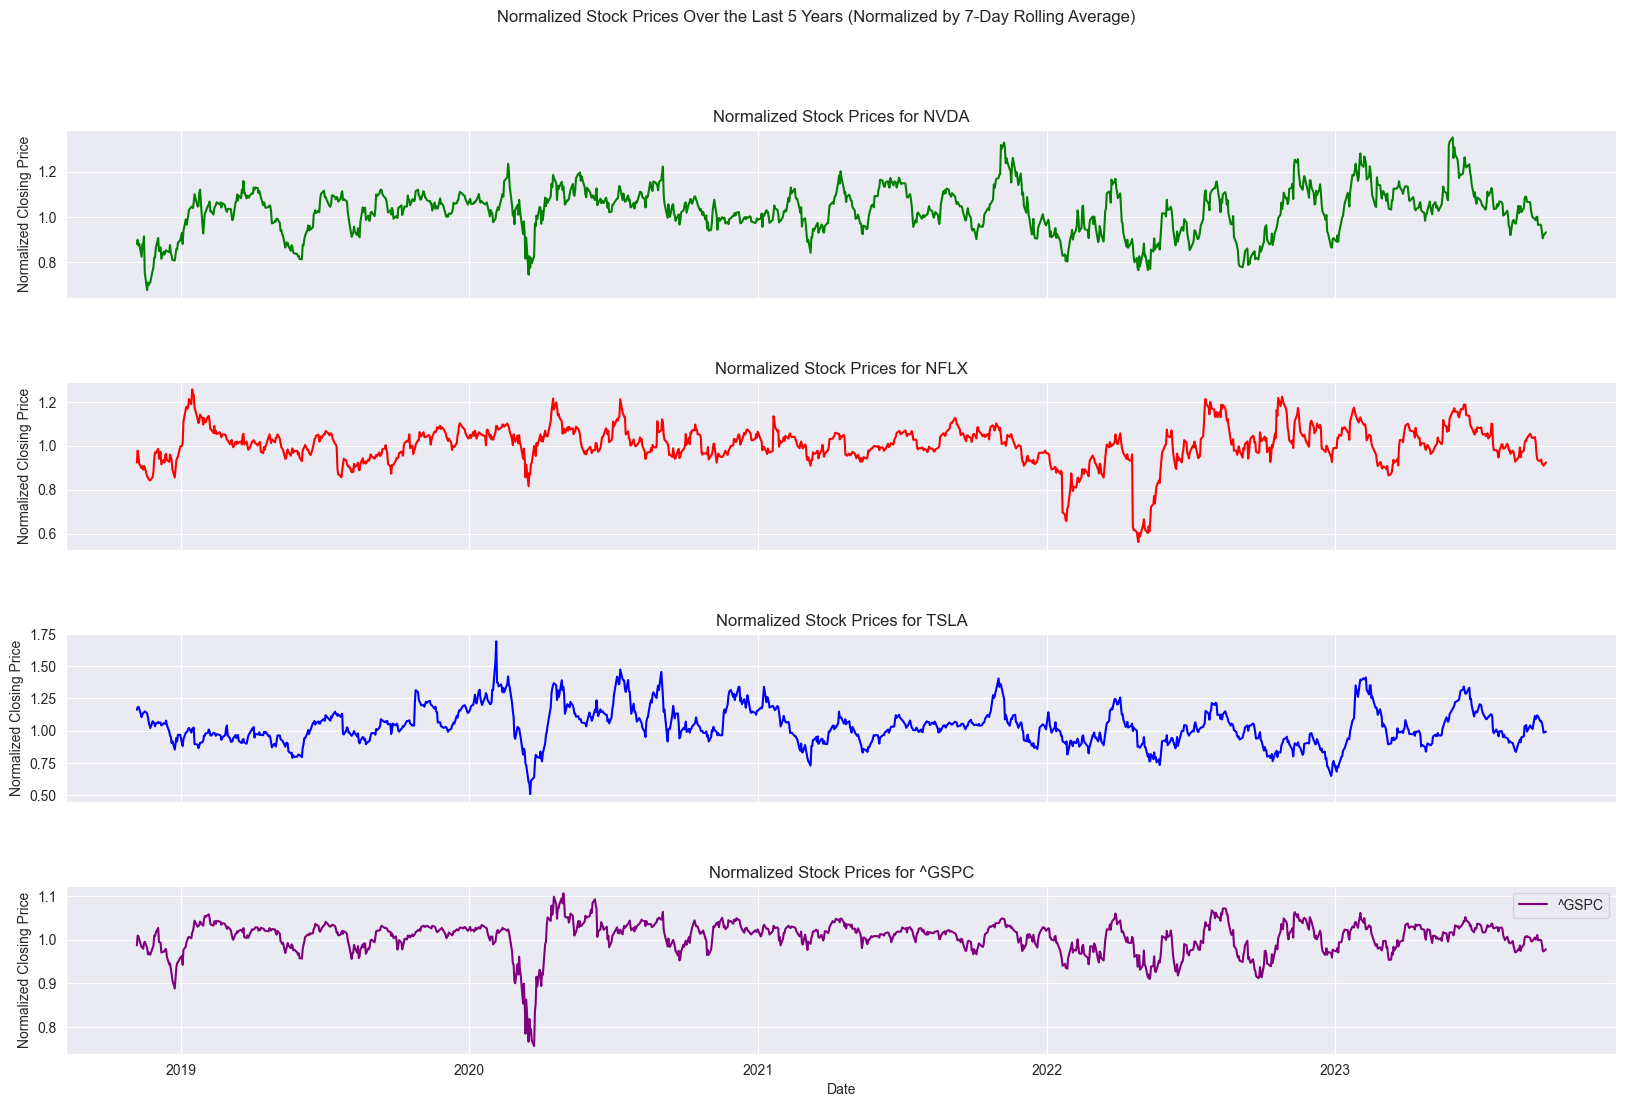

In [245]:
# Create a figure with multiple subplots for normalized data
fig, axs = plt.subplots(len(tickers), 1, figsize=(20, 12), sharex=True)

# Fetch and plot normalized data for each stock
for i, (ticker, color) in enumerate(zip(tickers, colors)):
    stock_data = fetch_data(ticker, period)
    plot_normalized_data(stock_data, ticker, color, axs[i])

plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.suptitle("Normalized Stock Prices Over the Last 5 Years (Normalized by 7-Day Rolling Average)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

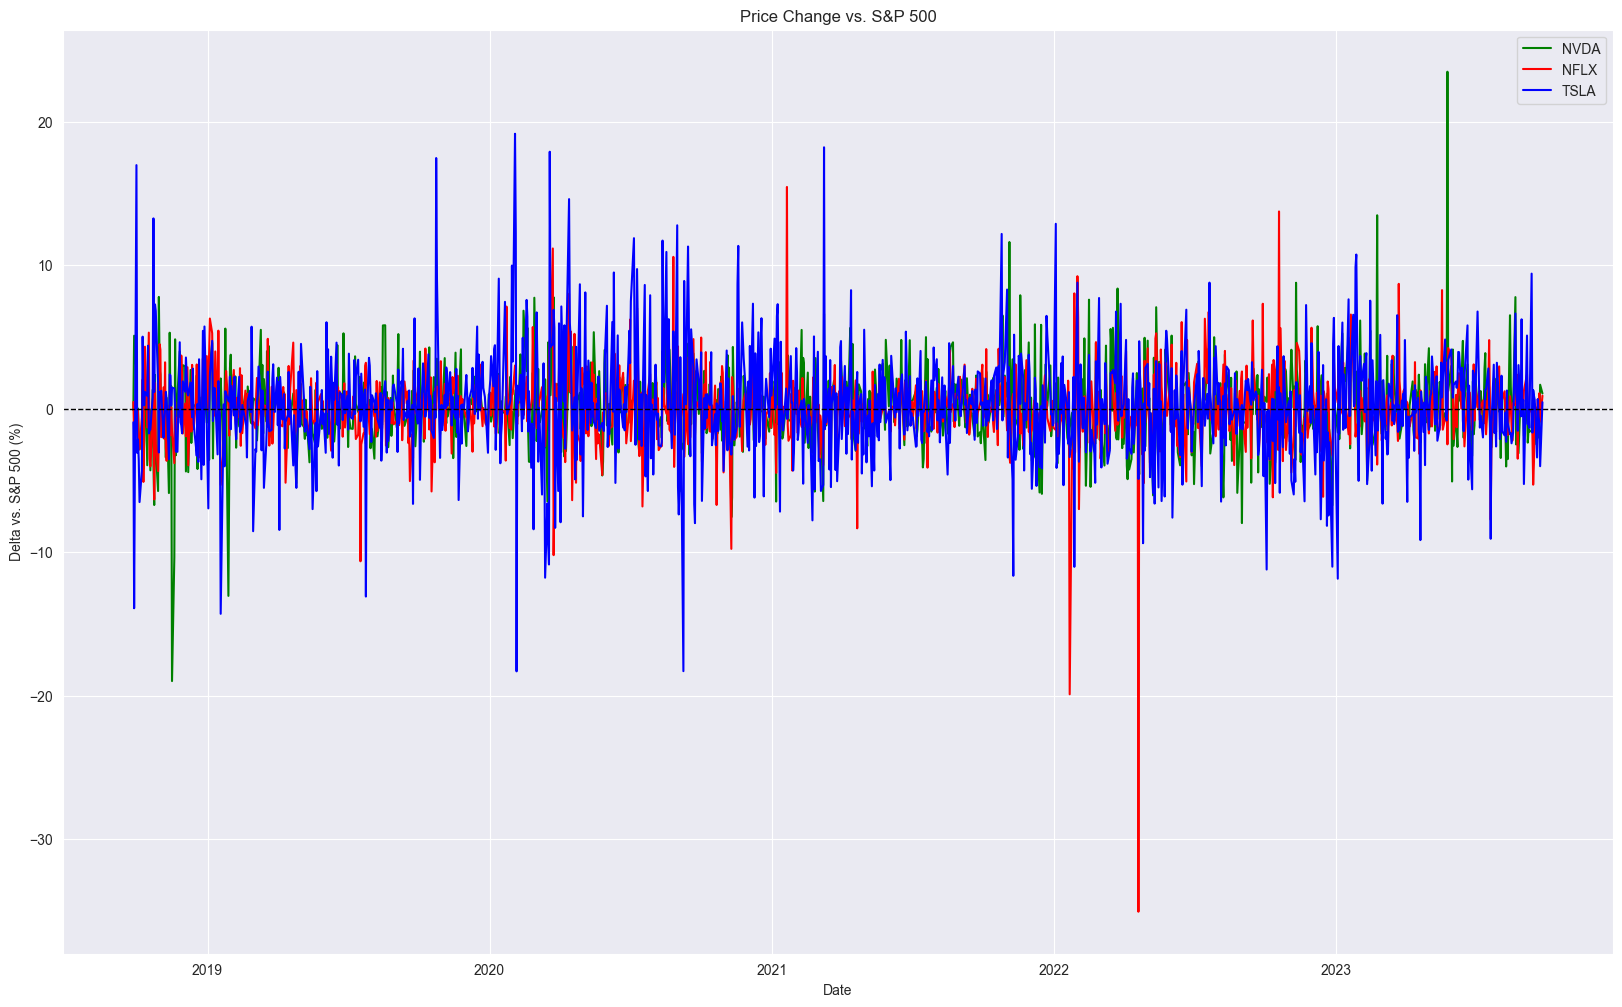

In [249]:
data = {}
for ticker in tickers:
    data[ticker] = fetch_data(ticker, period)

# Calculate daily price delta (percentage change) for each stock and the S&P 500
for ticker in data:
    data[ticker]['Delta'] = data[ticker]['Close'].pct_change() * 100

# Calculate the difference between each stock's delta and the S&P 500 delta
for ticker in tickers[:-1]:  # Exclude S&P 500 in the loop
    data[ticker]['Delta vs S&P 500'] = data[ticker]['Delta'] - data['^GSPC']['Delta']

# Create a plot to visualize the differences
plt.figure(figsize=(20, 12))
for ticker, color in zip(tickers[:-1], colors[:-1]):  # Exclude S&P 500
    plt.plot(data[ticker].index, data[ticker]['Delta vs S&P 500'], label=ticker, color=color)

plt.title("Price Change vs. S&P 500")
plt.xlabel("Date")
plt.ylabel("Delta vs. S&P 500 (%)")
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.show()

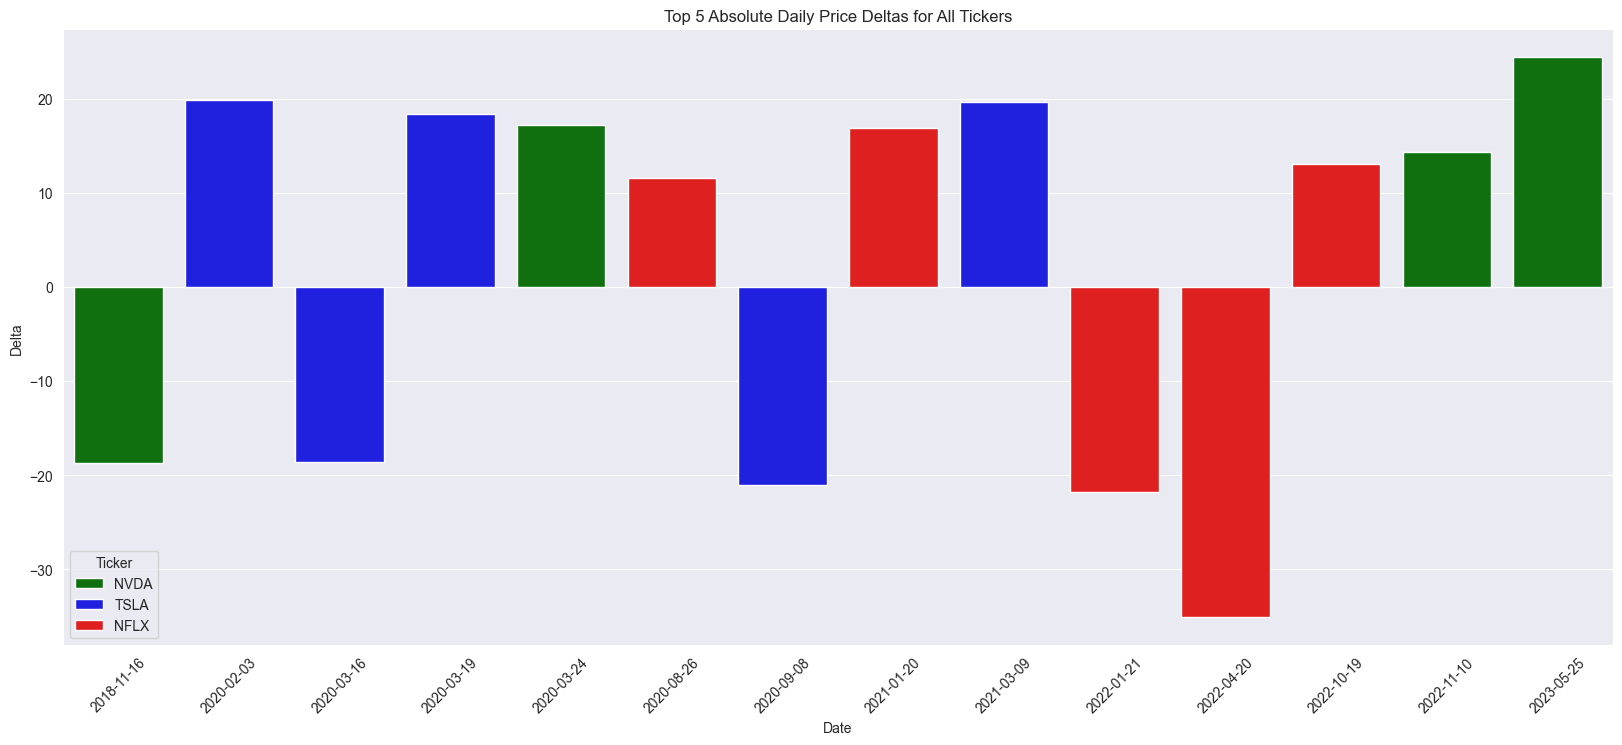

In [253]:
# Create a color palette for the tickers

# Create an empty DataFrame to store all the top deltas
all_top_deltas = pd.DataFrame(columns=['Date', 'Delta', 'Ticker'])

# Populate the DataFrame with data from each ticker
for i, ticker in enumerate(tickers[:-1]):  # Exclude S&P 500
    top_absolute_deltas = data[ticker]['Delta'].abs().nlargest(5)
    top_deltas_with_signal = data[ticker].loc[top_absolute_deltas.index]

    # Sort the data by date (earliest to latest)
    top_deltas_with_signal.sort_index(inplace=True)  # Added this line to sort by date

    # Format the date in a more readable way
    top_deltas_with_signal['Date'] = top_deltas_with_signal.index.strftime('%d-%m-%Y')

    # Add the ticker information
    top_deltas_with_signal['Ticker'] = ticker

    # Concatenate the data for this ticker to all_top_deltas
    all_top_deltas = pd.concat([all_top_deltas, top_deltas_with_signal])  # Concatenate data for this ticker

# Sort the entire DataFrame by Date (earliest to latest) and Delta (highest to lowest)
all_top_deltas['Date'] = pd.to_datetime(all_top_deltas['Date'], format='%d-%m-%Y')
all_top_deltas = all_top_deltas.sort_values(by=['Date', 'Delta'], ascending=[True, False])

# Modify the DataFrame to keep only the date portion
all_top_deltas['Date'] = all_top_deltas['Date'].dt.date  # Keep only the date portion

# Create a single bar chart for all top deltas with different colors
plt.figure(figsize=(20, 8))


# Set dodge=False to reduce the gap between bars
sns.barplot(x='Date', y='Delta', hue='Ticker', data=all_top_deltas, palette=ticker_colors, dodge=False)

plt.xlabel('Date')
plt.ylabel('Delta')
plt.title('Top 5 Absolute Daily Price Deltas for All Tickers')
plt.xticks(rotation=45)
plt.legend(title='Ticker')

# Show the single chart
plt.show()


In [ ]:
# Sample text for analysis
# Sample texts for analysis
sample_texts = [
    "I love this product! It's amazing.",
    "I don't like rainy days.",
    "The concert was fantastic!",
    "This movie is terrible.",
    "The weather is so-so today.",
]

# Analyze sentiment using TextBlob and VADER Sentiment
for sample_text in sample_texts:
    # TextBlob sentiment analysis
    text_blob = TextBlob(sample_text)
    tb_sentiment = text_blob.sentiment
    tb_polarity = tb_sentiment.polarity

    # Determine TextBlob sentiment label
    if tb_polarity > 0:
        tb_sentiment_label = "Positive"
    elif tb_polarity < 0:
        tb_sentiment_label = "Negative"
    else:
        tb_sentiment_label = "Neutral"

    # VADER Sentiment analysis
    analyzer = SentimentIntensityAnalyzer()
    vs_sentiment = analyzer.polarity_scores(sample_text)
    vs_polarity = vs_sentiment['compound']

    # Determine VADER Sentiment label
    if vs_polarity > 0.05:
        vs_sentiment_label = "Positive"
    elif vs_polarity < -0.05:
        vs_sentiment_label = "Negative"
    else:
        vs_sentiment_label = "Neutral"

    # Print results
    print("Sample Text:", sample_text)
    print("TextBlob Sentiment Polarity:", tb_polarity)
    print("TextBlob Sentiment Label:", tb_sentiment_label)
    print("VADER Sentiment Polarity:", vs_polarity)
    print("VADER Sentiment Label:", vs_sentiment_label)
    print("\n")